In [86]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
from numba import jit

# P3 fig

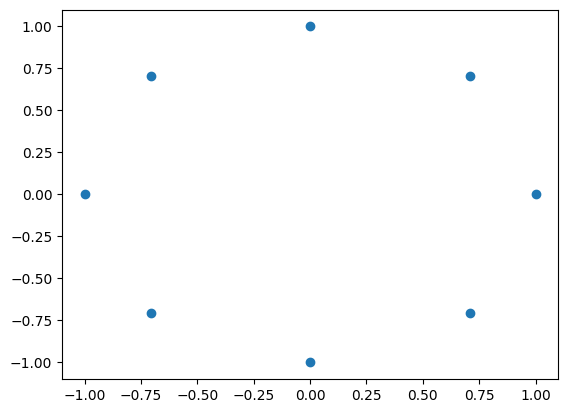

In [4]:
T1 = np.linspace(0,2*np.pi,8,endpoint=False)
plt.scatter(np.cos(T1),np.sin(T1))


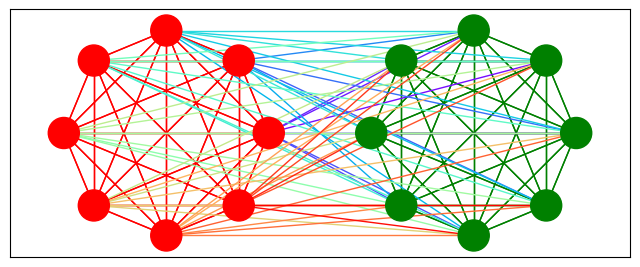

In [7]:
import networkx as nx
import matplotlib.pyplot as plt
import itertools
import numpy as np

# 매개변수 설정
N = 8  # 왼쪽 노드 그룹의 노드 수
M = 8  # 오른쪽 노드 그룹의 노드 수

# 그래프 생성
G = nx.Graph()

# 왼쪽 그룹 노드 (빨간색)
left_nodes = range(N)
G.add_nodes_from(left_nodes)

# 오른쪽 그룹 노드 (녹색)
right_nodes = range(N, N + M)
G.add_nodes_from(right_nodes)

# 왼쪽 그룹 내 완전 연결
for i in left_nodes:
    for j in left_nodes:
        if i != j:
            G.add_edge(i, j)

# 오른쪽 그룹 내 완전 연결
for i in right_nodes:
    for j in right_nodes:
        if i != j:
            G.add_edge(i, j)

# 순열을 사용해 그룹 간 엣지 연결
permuted_edges = list(itertools.permutations(left_nodes, 2))

# 엣지 색상을 위한 컬러맵 생성 (총 엣지 수만큼 색상 배열 생성)
edge_colors = plt.cm.rainbow(np.linspace(0, 1, len(permuted_edges)))

# 두 그룹 간 엣지 연결에 순열 사용 및 엣지 색상 설정
for idx, (i, j) in enumerate(zip(left_nodes, right_nodes)):
    G.add_edge(i, j)

# 그래프 레이아웃 설정
pos = {}

# 왼쪽 그룹은 왼쪽에 배치
left_pos = nx.circular_layout(left_nodes)
for i in range(N):
    pos[i] = [left_pos[i][0] - 1.5, left_pos[i][1]]

# 오른쪽 그룹은 오른쪽에 배치
right_pos = nx.circular_layout(right_nodes)
for i in range(N, N + M):
    pos[i] = [right_pos[i][0] + 1.5, right_pos[i][1]]

# 노드 색상 설정
color_map = []
for node in G:
    if node in left_nodes:
        color_map.append('red')
    else:
        color_map.append('green')

# 그림 그리기
plt.figure(figsize=(8, 5))

# 왼쪽, 오른쪽 완전 연결 그리기
nx.draw_networkx_nodes(G, pos, node_color=color_map, node_size=500)
nx.draw_networkx_edges(G, pos, edgelist=[(i, j) for i in left_nodes for j in left_nodes if i != j], edge_color='red')
nx.draw_networkx_edges(G, pos, edgelist=[(i, j) for i in right_nodes for j in right_nodes if i != j], edge_color='green')

# 그룹 간 엣지에 순열 및 색상 적용하여 그리기
for idx, (i, j) in enumerate(itertools.permutations(left_nodes, 2)):
    nx.draw_networkx_edges(G, pos, edgelist=[(i, right_nodes[idx % M])], edge_color=[edge_colors[idx]])

plt.gca().set_aspect(1)
plt.show()


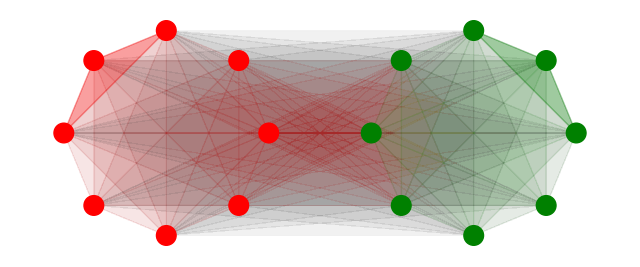

In [56]:
import networkx as nx
import matplotlib.pyplot as plt
import itertools
from matplotlib.patches import Polygon
# 매개변수 설정
N = 8  # 왼쪽 노드 그룹의 노드 수
M = 8  # 오른쪽 노드 그룹의 노드 수

# 그래프 생성
G = nx.Graph()

# 왼쪽 그룹 노드 (빨간색)
left_nodes = range(N)
G.add_nodes_from(left_nodes)

# 오른쪽 그룹 노드 (녹색)
right_nodes = range(N, N + M)
G.add_nodes_from(right_nodes)

# 왼쪽 그룹 내 완전 연결
for i in left_nodes:
    for j in left_nodes:
        if i != j:
            G.add_edge(i, j)

# 오른쪽 그룹 내 완전 연결
for i in right_nodes:
    for j in right_nodes:
        if i != j:
            G.add_edge(i, j)

# 두 그룹 간 엣지 연결
for i in left_nodes:
    for j in right_nodes:
        G.add_edge(i, j)

# 그래프 레이아웃 설정
pos = {}

# 왼쪽 그룹은 왼쪽에 배치
left_pos = nx.circular_layout(left_nodes)
for i in range(N):
    pos[i] = [left_pos[i][0] - 1.5, left_pos[i][1]]

# 오른쪽 그룹은 오른쪽에 배치
right_pos = nx.circular_layout(right_nodes)
for i in range(N, N + M):
    pos[i] = [right_pos[i][0] + 1.5, right_pos[i][1]]

# 노드 색상 설정
color_map = []
for node in G:
    if node in left_nodes:
        color_map.append('red')
    else:
        color_map.append('green')

# 그림 그리기
plt.figure(figsize=(8, 5))

# 왼쪽, 오른쪽 완전 연결 그리기
nx.draw_networkx_nodes(G, pos, node_color=color_map, node_size=200)
nx.draw_networkx_edges(G, pos, edgelist=[(i, j) for i in left_nodes for j in left_nodes if i != j], edge_color='red',alpha=0)
nx.draw_networkx_edges(G, pos, edgelist=[(i, j) for i in right_nodes for j in right_nodes if i != j], edge_color='green',alpha=0)

# 그룹 간 엣지 그리기 (노란색, 투명도 50%)
edge_color = (0.4, 0.4, 0, 0.0)  # 노란색(RGB) + 투명도(alpha) 50%
nx.draw_networkx_edges(G, pos, edgelist=[(i, j) for i in left_nodes for j in right_nodes], edge_color=edge_color)

num1 = 0
want = [2,3,4]
for combination in itertools.combinations(left_nodes, 3):
    triangle_pos = [pos[n] for n in combination]
    triangle = Polygon(triangle_pos, color='red', alpha=0.01)
    plt.gca().add_patch(triangle)

triangle_pos = [pos[n] for n in want]
triangle = Polygon(triangle_pos, color='red', alpha=0.3)
plt.gca().add_patch(triangle)

# 그룹 2 (오른쪽 그룹)에서 3개 노드가 상호작용하는 경우 (초록색, 투명도 0.1)
want = [N,N+1,N+2]
for combination in itertools.combinations(right_nodes, 3):
    triangle_pos = [pos[n] for n in combination]
    triangle = Polygon(triangle_pos, color='green', alpha=0.01)
    plt.gca().add_patch(triangle)
triangle_pos = [pos[n] for n in want]
triangle = Polygon(triangle_pos, color='green', alpha=0.3)
plt.gca().add_patch(triangle)
# 테두리 제거


# 그룹 1에서 1개, 그룹 2에서 2개가 선택될 경우 (갈색, 투명도 0.003)
for combination_left in itertools.combinations(left_nodes, 1):
    for combination_right in itertools.combinations(right_nodes, 2):
        selected_nodes = list(combination_left) + list(combination_right)
        triangle_pos = [pos[n] for n in selected_nodes]
        triangle = Polygon(triangle_pos, color='brown', alpha=0.003,zorder=-1)
        plt.gca().add_patch(triangle)

# 그룹 1에서 2개, 그룹 2에서 1개가 선택될 경우 (갈색, 투명도 0.003)
for combination_left in itertools.combinations(left_nodes, 2):
    for combination_right in itertools.combinations(right_nodes, 1):
        selected_nodes = list(combination_left) + list(combination_right)
        triangle_pos = [pos[n] for n in selected_nodes]
        triangle = Polygon(triangle_pos, color='brown', alpha=0.003,zorder=-1)
        plt.gca().add_patch(triangle)


plt.gca().set_aspect(1)
plt.axis('off')
plt.show()


In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import itertools
from matplotlib.patches import Polygon
# 매개변수 설정
N = 8  # 왼쪽 노드 그룹의 노드 수
M = 8  # 오른쪽 노드 그룹의 노드 수

# 그래프 생성
G = nx.Graph()

# 왼쪽 그룹 노드 (빨간색)
left_nodes = range(N)
G.add_nodes_from(left_nodes)

# 오른쪽 그룹 노드 (녹색)
right_nodes = range(N, N + M)
G.add_nodes_from(right_nodes)

# 왼쪽 그룹 내 완전 연결
for i in left_nodes:
    for j in left_nodes:
        if i != j:
            G.add_edge(i, j)

# 오른쪽 그룹 내 완전 연결
for i in right_nodes:
    for j in right_nodes:
        if i != j:
            G.add_edge(i, j)

# 두 그룹 간 엣지 연결
for i in left_nodes:
    for j in right_nodes:
        G.add_edge(i, j)

# 그래프 레이아웃 설정
pos = {}

# 왼쪽 그룹은 왼쪽에 배치
left_pos = nx.circular_layout(left_nodes)
for i in range(N):
    pos[i] = [left_pos[i][0] - 1.5, left_pos[i][1]]

# 오른쪽 그룹은 오른쪽에 배치
right_pos = nx.circular_layout(right_nodes)
for i in range(N, N + M):
    pos[i] = [right_pos[i][0] + 1.5, right_pos[i][1]]

# 노드 색상 설정
color_map = []
for node in G:
    if node in left_nodes:
        color_map.append('red')
    else:
        color_map.append('green')

# 그림 그리기
plt.figure(figsize=(8, 5))

# 왼쪽, 오른쪽 완전 연결 그리기
nx.draw_networkx_nodes(G, pos, node_color=color_map, node_size=200)
nx.draw_networkx_edges(G, pos, edgelist=[(i, j) for i in left_nodes for j in left_nodes if i != j], edge_color='red',alpha=0)
nx.draw_networkx_edges(G, pos, edgelist=[(i, j) for i in right_nodes for j in right_nodes if i != j], edge_color='green',alpha=0)

# 그룹 간 엣지 그리기 (노란색, 투명도 50%)
edge_color = (0.4, 0.4, 0, 0.0)  # 노란색(RGB) + 투명도(alpha) 50%
nx.draw_networkx_edges(G, pos, edgelist=[(i, j) for i in left_nodes for j in right_nodes], edge_color=edge_color)

num1 = 0
want = [2,3,4]
for combination in itertools.combinations(left_nodes, 3):
    triangle_pos = [pos[n] for n in combination]
    triangle = Polygon(triangle_pos, color='red', alpha=0.01)
    plt.gca().add_patch(triangle)

triangle_pos = [pos[n] for n in want]
triangle = Polygon(triangle_pos, color='red', alpha=0.3)
plt.gca().add_patch(triangle)

# 그룹 2 (오른쪽 그룹)에서 3개 노드가 상호작용하는 경우 (초록색, 투명도 0.1)
want = [N,N+1,N+2]
for combination in itertools.combinations(right_nodes, 3):
    triangle_pos = [pos[n] for n in combination]
    triangle = Polygon(triangle_pos, color='green', alpha=0.01)
    plt.gca().add_patch(triangle)
triangle_pos = [pos[n] for n in want]
triangle = Polygon(triangle_pos, color='green', alpha=0.3)
plt.gca().add_patch(triangle)
# 테두리 제거


# 그룹 1에서 1개, 그룹 2에서 2개가 선택될 경우 (갈색, 투명도 0.003)
for combination_left in itertools.combinations(left_nodes, 1):
    for combination_right in itertools.combinations(right_nodes, 2):
        selected_nodes = list(combination_left) + list(combination_right)
        triangle_pos = [pos[n] for n in selected_nodes]
        triangle = Polygon(triangle_pos, color='brown', alpha=0.003,zorder=-1)
        plt.gca().add_patch(triangle)

# 그룹 1에서 2개, 그룹 2에서 1개가 선택될 경우 (갈색, 투명도 0.003)
for combination_left in itertools.combinations(left_nodes, 2):
    for combination_right in itertools.combinations(right_nodes, 1):
        selected_nodes = list(combination_left) + list(combination_right)
        triangle_pos = [pos[n] for n in selected_nodes]
        triangle = Polygon(triangle_pos, color='brown', alpha=0.003,zorder=-1)
        plt.gca().add_patch(triangle)


plt.gca().set_aspect(1)
plt.axis('off')
plt.show()


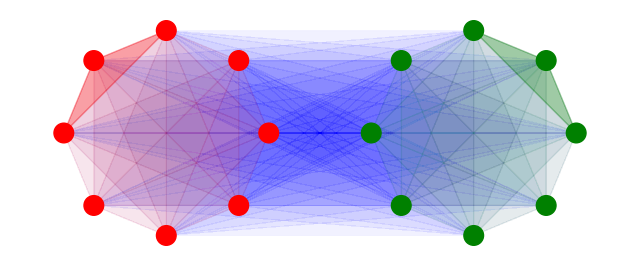

In [58]:
import networkx as nx
import matplotlib.pyplot as plt
import itertools
from matplotlib.patches import Polygon
# 매개변수 설정
N = 8  # 왼쪽 노드 그룹의 노드 수
M = 8  # 오른쪽 노드 그룹의 노드 수

# 그래프 생성
G = nx.Graph()

# 왼쪽 그룹 노드 (빨간색)
left_nodes = range(N)
G.add_nodes_from(left_nodes)

# 오른쪽 그룹 노드 (녹색)
right_nodes = range(N, N + M)
G.add_nodes_from(right_nodes)

# 왼쪽 그룹 내 완전 연결
for i in left_nodes:
    for j in left_nodes:
        if i != j:
            G.add_edge(i, j)

# 오른쪽 그룹 내 완전 연결
for i in right_nodes:
    for j in right_nodes:
        if i != j:
            G.add_edge(i, j)

# 두 그룹 간 엣지 연결
for i in left_nodes:
    for j in right_nodes:
        G.add_edge(i, j)

# 그래프 레이아웃 설정
pos = {}

# 왼쪽 그룹은 왼쪽에 배치
left_pos = nx.circular_layout(left_nodes)
for i in range(N):
    pos[i] = [left_pos[i][0] - 1.5, left_pos[i][1]]

# 오른쪽 그룹은 오른쪽에 배치
right_pos = nx.circular_layout(right_nodes)
for i in range(N, N + M):
    pos[i] = [right_pos[i][0] + 1.5, right_pos[i][1]]

# 노드 색상 설정
color_map = []
for node in G:
    if node in left_nodes:
        color_map.append('red')
    else:
        color_map.append('green')

# 그림 그리기
plt.figure(figsize=(8, 5))

# 왼쪽, 오른쪽 완전 연결 그리기
nx.draw_networkx_nodes(G, pos, node_color=color_map, node_size=200)
nx.draw_networkx_edges(G, pos, edgelist=[(i, j) for i in left_nodes for j in left_nodes if i != j], edge_color='red',alpha=0)
nx.draw_networkx_edges(G, pos, edgelist=[(i, j) for i in right_nodes for j in right_nodes if i != j], edge_color='green',alpha=0)

# 그룹 간 엣지 그리기 (노란색, 투명도 50%)
edge_color = (0.4, 0.4, 0, 0.0)  # 노란색(RGB) + 투명도(alpha) 50%
nx.draw_networkx_edges(G, pos, edgelist=[(i, j) for i in left_nodes for j in right_nodes], edge_color=edge_color)

num1 = 0
want = [2,3,4]
for combination in itertools.combinations(left_nodes, 3):
    triangle_pos = [pos[n] for n in combination]
    triangle = Polygon(triangle_pos, color='red', alpha=0.01)
    plt.gca().add_patch(triangle)

triangle_pos = [pos[n] for n in want]
triangle = Polygon(triangle_pos, color='red', alpha=0.3)
plt.gca().add_patch(triangle)

# 그룹 2 (오른쪽 그룹)에서 3개 노드가 상호작용하는 경우 (초록색, 투명도 0.1)
for combination in itertools.combinations(right_nodes, 3):
    triangle_pos = [pos[n] for n in combination]
    triangle = Polygon(triangle_pos, color='green', alpha=0.01)
    plt.gca().add_patch(triangle)
want = [N,N+1,N+2]
triangle_pos = [pos[n] for n in want]
triangle = Polygon(triangle_pos, color='green', alpha=0.3)
plt.gca().add_patch(triangle)
# 테두리 제거


# 그룹 1에서 1개, 그룹 2에서 2개가 선택될 경우 (갈색, 투명도 0.003)
for combination_left in itertools.combinations(left_nodes, 1):
    for combination_right in itertools.combinations(right_nodes, 2):
        selected_nodes = list(combination_left) + list(combination_right)
        triangle_pos = [pos[n] for n in selected_nodes]
        triangle = Polygon(triangle_pos, color='brown', alpha=0.003,zorder=-1)
        plt.gca().add_patch(triangle)

# 그룹 1에서 2개, 그룹 2에서 1개가 선택될 경우 (갈색, 투명도 0.003)
for combination_left in itertools.combinations(left_nodes, 2):
    for combination_right in itertools.combinations(right_nodes, 1):
        selected_nodes = list(combination_left) + list(combination_right)
        triangle_pos = [pos[n] for n in selected_nodes]
        triangle = Polygon(triangle_pos, color='brown', alpha=0.003,zorder=-1)
        plt.gca().add_patch(triangle)


plt.gca().set_aspect(1)
plt.axis('off')
plt.show()


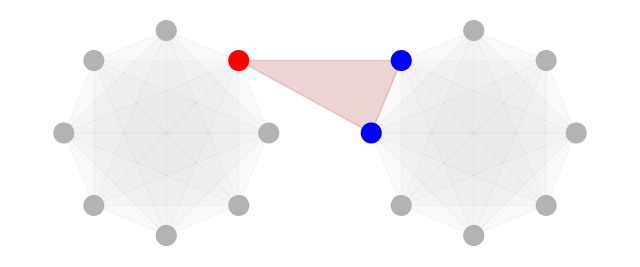

In [85]:
import networkx as nx
import matplotlib.pyplot as plt
import itertools
from matplotlib.patches import Polygon
# 매개변수 설정
N = 8  # 왼쪽 노드 그룹의 노드 수
M = 8  # 오른쪽 노드 그룹의 노드 수

# 그래프 생성
G = nx.Graph()

# 왼쪽 그룹 노드 (빨간색)
left_nodes = range(N)
G.add_nodes_from(left_nodes)

# 오른쪽 그룹 노드 (녹색)
right_nodes = range(N, N + M)
G.add_nodes_from(right_nodes)

# 왼쪽 그룹 내 완전 연결
for i in left_nodes:
    for j in left_nodes:
        if i != j:
            G.add_edge(i, j)

# 오른쪽 그룹 내 완전 연결
for i in right_nodes:
    for j in right_nodes:
        if i != j:
            G.add_edge(i, j)

# 두 그룹 간 엣지 연결
for i in left_nodes:
    for j in right_nodes:
        G.add_edge(i, j)

# 그래프 레이아웃 설정
pos = {}

# 왼쪽 그룹은 왼쪽에 배치
left_pos = nx.circular_layout(left_nodes)
for i in range(N):
    pos[i] = [left_pos[i][0] - 1.5, left_pos[i][1]]

# 오른쪽 그룹은 오른쪽에 배치
right_pos = nx.circular_layout(right_nodes)
for i in range(N, N + M):
    pos[i] = [right_pos[i][0] + 1.5, right_pos[i][1]]

# 노드 색상 설정
color_map = []
l_node = [1,]
r_node = [N+4,N+3]
for node in G:
    if node in l_node:
        color_map.append('red')
    elif node in r_node:
        color_map.append('blue')
    else:
        color_map.append((0.7,0.7,0.7))

# 그림 그리기
plt.figure(figsize=(8, 5))

# 왼쪽, 오른쪽 완전 연결 그리기
nx.draw_networkx_nodes(G, pos, node_color=color_map, node_size=200)
nx.draw_networkx_edges(G, pos, edgelist=[(i, j) for i in left_nodes for j in left_nodes if i != j], edge_color='red',alpha=0)
nx.draw_networkx_edges(G, pos, edgelist=[(i, j) for i in right_nodes for j in right_nodes if i != j], edge_color='green',alpha=0)

# 그룹 간 엣지 그리기 (노란색, 투명도 50%)
edge_color = (0.4, 0.4, 0, 0.0)  # 노란색(RGB) + 투명도(alpha) 50%
nx.draw_networkx_edges(G, pos, edgelist=[(i, j) for i in left_nodes for j in right_nodes], edge_color=edge_color)

for combination in itertools.combinations(left_nodes, 3):
    triangle_pos = [pos[n] for n in combination]
    triangle = Polygon(triangle_pos, color='black', alpha=0.002)
    plt.gca().add_patch(triangle)

# 그룹 2 (오른쪽 그룹)에서 3개 노드가 상호작용하는 경우 (초록색, 투명도 0.1)
for combination in itertools.combinations(right_nodes, 3):
    triangle_pos = [pos[n] for n in combination]
    triangle = Polygon(triangle_pos, color='black', alpha=0.002)
    plt.gca().add_patch(triangle)

# 테두리 제거


# 그룹 1에서 1개, 그룹 2에서 2개가 선택될 경우 (갈색, 투명도 0.002)
for combination_left in itertools.combinations(left_nodes, 1):
    for combination_right in itertools.combinations(right_nodes, 2):
        selected_nodes = list(combination_left) + list(combination_right)
        triangle_pos = [pos[n] for n in selected_nodes]
        triangle = Polygon(triangle_pos, color='black', alpha=0.001,zorder=-1)
        plt.gca().add_patch(triangle)

# 그룹 1에서 2개, 그룹 2에서 1개가 선택될 경우 (갈색, 투명도 0.001)
for combination_left in itertools.combinations(left_nodes, 2):
    for combination_right in itertools.combinations(right_nodes, 1):
        selected_nodes = list(combination_left) + list(combination_right)
        triangle_pos = [pos[n] for n in selected_nodes]
        triangle = Polygon(triangle_pos, color='black', alpha=0.001,zorder=-1)
        plt.gca().add_patch(triangle)
want = [1,N+3,N+4]
triangle_pos = [pos[n] for n in want]
triangle = Polygon(triangle_pos, color='brown', alpha=0.2)
plt.gca().add_patch(triangle)

plt.gca().set_aspect(1)
plt.axis('off')
plt.show()


# Pairwise interaction and Triadic interaction

In [ ]:
@jit(nopython=True)
def RK4(f, y0, t, args=()):
    n = len(t)
    y = np.zeros((n,len(y0)))
    y[0] = y0

    for i in range(n - 1):
        h = t[i + 1] - t[i]
        k1 = f(y[i], t[i], *args)
        k2 = f(y[i] + k1 * h / 2.0, t[i] + h / 2.0, *args)
        k3 = f(y[i] + k2 * h / 2.0, t[i] + h / 2.0, *args)
        k4 = f(y[i] + k3 * h, t[i] + h, *args)
        y[i + 1] = y[i] + (h / 6.0) * (k1 + 2 * k2 + 2 * k3 + k4)
    return y
args = ()
@jit(nopython=True)
def H_Chimera(u,t=0,args = args):
    r1 = u[0]
    r2 = u[1]
    phi = u[2]
    beta,alpha,eta1,eta2 = args
    dr1 = 1/2 * r1* (1-r1**2)*(eta1**2 * r1**2 * np.cos(alpha) + 2 * beta*eta1*eta2*r1*r2*np.cos(alpha+phi) + beta**2 * eta2**2 * r2**2 * np.cos(alpha + 2*phi))
    dr2 = 1/2 * r2* (1-r2**2)*(eta2**2 * r2**2 * np.cos(alpha) + 2 * beta*eta1*eta2*r2*r1*np.cos(alpha-phi) + beta**2 * eta1**2 * r1**2 * np.cos(alpha - 2*phi))
    dpsi1 = -1/2 * (1+r1**2)*(eta1**2 * r1**2 * np.sin(alpha) + 2 * beta*eta1*eta2*r1*r2*np.sin(alpha+phi) + beta**2 * eta2**2 * r2**2 * np.sin(alpha + 2*phi))
    dpsi2 = -1/2 * (1+r2**2)*(eta2**2 * r2**2 * np.sin(alpha) + 2 * beta*eta1*eta2*r2*r1*np.sin(alpha-phi) + beta**2 * eta1**2 * r1**2 * np.sin(alpha - 2*phi))
    dphi = dpsi1 - dpsi2
    return np.array([dr1,dr2,dphi])


@jit(nopython=True)
def myFun2(u,t=0,args = args):
    r = u[0]
    phi = u[1]
    beta,alpha,eta1,eta2 = args
    dr = 1/2 * r* (1-r**2)*(eta2**2 * r**2 * np.cos(alpha) + 2 * beta*eta1*eta2*r*np.cos(alpha+phi) + beta**2 * eta1**2 * np.cos(alpha + 2*phi))
    dpsi2 = -1/2 * (1+r**2)*(eta2**2 * r**2 * np.sin(alpha) + 2 * beta*eta1*eta2*r*np.sin(alpha+phi) + beta**2 * eta1**2 * np.sin(alpha + 2*phi))
    dpsi1 = -1/2 * (2)*(eta1**2 * np.sin(alpha) + 2 * beta*eta1*eta2*r *np.sin(alpha-phi) + beta**2 * eta2**2 * r**2 * np.sin(alpha-2*phi))
    dphi =  dpsi2 - dpsi1
    return np.array([dr,dphi])

def myFun3(u,t=0,args = args):
    r = u[0]
    phi = u[1]
    beta,alpha,eta1,eta2 = args
    dr = 1/2 * r* (1-r**2)*(eta2**2 * r**2 * np.cos(alpha) + 2 * beta*eta1*eta2*r*np.cos(alpha+phi) + beta**2 * eta1**2 * np.cos(alpha + 2*phi))
    dpsi2 = -1/2 * (1+r**2)*(eta2**2 * r**2 * np.sin(alpha) + 2 * beta*eta1*eta2*r*np.sin(alpha+phi) + beta**2 * eta1**2 * np.sin(alpha + 2*phi))
    dpsi1 = -1/2 * (2)*(eta1**2 * np.sin(alpha) + 2 * beta*eta1*eta2*r *np.sin(alpha-phi) + beta**2 * eta2**2 * r**2 * np.sin(alpha-2*phi))
    dphi =  dpsi2 - dpsi1
    return np.array([dr,dphi])

In [87]:
@jit(nopython=True)
def get_ZE12(Etheta):
    ''' get theta and return r and theta'''
    E1 = Etheta
    E2 = E1**2
    Z1,Z2 = np.mean(E1),np.mean(E2)
    return Z1,Z2

In [102]:
@jit(nopython=True)
def Kuramoto_MF_SOLVABLE(Theta,t,Na,Nb,nu,mu,alpha):
    dtheta = np.zeros(Na+Nb)
    Etheta = np.exp(1j*Theta)
    EA,EB = Etheta[:Na],Etheta[Na:]
    Z1a,Z2a = get_ZE12(EA)
    Z1b,Z2b = get_ZE12(EB)
    A = np.exp(-1j*alpha)
    EA,EB = np.conjugate(EA), np.conjugate(EB)
    ZZa =  (mu*Z1a+nu*Z1b)
    ZZb =  (mu*Z1b+nu*Z1a)
    dtheta[:Na] = ((A*ZZa)*EA).imag
    dtheta[Na:] = ((A*ZZb)*EB).imag
    return dtheta,Z1a,Z1b,Z2a,Z2b


@jit(nopython=True)
def Kuramoto_MF_CHIMERA(Theta,t,Na,Nb,beta,alpha,K):
    dtheta = np.zeros(Na+Nb)

    Etheta = np.exp(1j*Theta)
    EA,EB = Etheta[:Na],Etheta[Na:]
    Z1a,Z2a = get_ZE12(EA)
    Z1b,Z2b = get_ZE12(EB)
    A = np.exp(-1j*alpha)
    EA,EB = np.conjugate(EA), np.conjugate(EB)
    ZZa =  K*(Z1a+beta*Z1b)
    ZZb =  K*(Z1b+beta*Z1a)
    dtheta[:Na] = ((A*(ZZa**2))*EA*EA).imag
    dtheta[Na:] = ((A*(ZZb**2))*EB*EB).imag
    return dtheta,Z1a,Z1b,Z2a,Z2b
@jit(nopython=True)
def RK4_ZZ(f, y0, t, args=()):
    n = len(t)
    y = np.zeros((n, len(y0)))
    Etheta = np.exp(1j*y0)
    Na = args[0]
    EA,EB = Etheta[:Na],Etheta[Na:]
    Z1a,Z2a = get_ZE12(EA)
    Z1b,Z2b = get_ZE12(EB)
    Z1as = np.zeros(n,dtype=np.complex64)
    Z1bs = np.zeros(n,dtype=np.complex64)
    Z2as = np.zeros(n,dtype=np.complex64)
    Z2bs = np.zeros(n,dtype=np.complex64)

    Z1as[0] = Z1a
    Z2as[0] = Z2a
    Z1bs[0] = Z1b
    Z2bs[0] = Z2b
    
    y[0] = y0
    
    for i in range(n - 1):
        h = t[i + 1] - t[i]
        k1,Z1a,Z1b,Z2a,Z2b = f(y[i], t[i], *args)
        k2,_,_,_,_ = f(y[i] + k1 * h / 2.0, t[i] + h / 2.0, *args)
        k3,_,_,_,_ = f(y[i] + k2 * h / 2.0, t[i] + h / 2.0, *args)
        k4,_,_,_,_ = f(y[i] + k3 * h, t[i] + h, *args)
        y[i + 1] = y[i] + (h / 6.0) * (k1 + 2 * k2 + 2 * k3 + k4)
        Z1as[i+1],Z1bs[i+1],Z2as[i+1],Z2bs[i+1] = Z1a,Z1b,Z2a,Z2b
    return y,(Z1as,Z1bs,Z2as,Z2bs)

In [ ]:

N = 1000
N1 = N2 = N
ps = (np.arange(N+1)[:-1] + 1)/(N+1)


In [270]:
N = 1000
N1 = N2 = N
theta1 = np.random.uniform(0,np.pi*2,N)
theta2 = np.random.uniform(0,np.pi*2,N)
Theta = np.r_[theta1,theta2]


In [271]:
t = np.arange(0,10000,0.1)

In [272]:
A = 1
# beta = 0.1
nu = (1-A)/2
mu = (1+A)/2
alpha = np.pi/2 - 1

In [297]:
N1 = N2 = N
K = 1
thetas,(Z1as,Z1bs,Z2as,Z2bs) = RK4_ZZ(Kuramoto_MF_SOLVABLE,Theta.copy(),t,args=(N1,N2,nu,mu,alpha))
R1_S = np.abs(Z1as)
R2_S = np.abs(Z1bs)
Q1_S = np.abs(Z2as)
Q2_S = np.abs(Z2bs)

In [274]:
R2_S[-1]

0.99999994

In [275]:
R2_S[0]

0.018564856

Text(0.5, 0, 't')

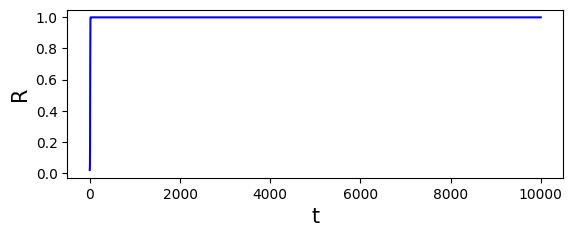

In [276]:
# plt.plot(t,R1_S)
plt.subplot(212)
plt.plot(t,R2_S,color='blue')
plt.ylabel('R',fontsize=15)
plt.xlabel('t',fontsize=15)

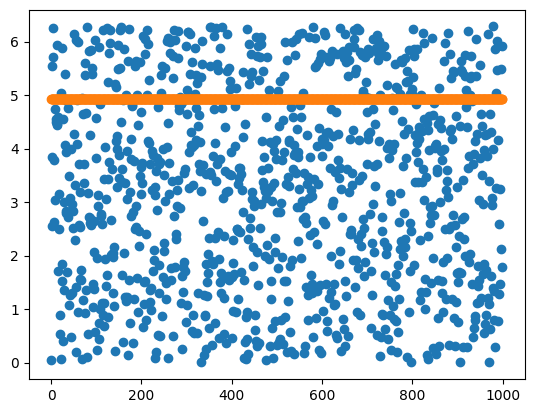

In [212]:
plt.scatter(np.arange(N),theta1)
plt.scatter(np.arange(N),(thetas[-1,N:])%(2*np.pi))

In [305]:
N1 = N2 = N
K = 1

# alpha = 1.2
beta = 0
# eta1 = 0.2
# eta2 = 0.1

# args = beta,alpha,eta1,eta2

thetas,(Z1as,Z1bs,Z2as,Z2bs) = RK4_ZZ(Kuramoto_MF_CHIMERA,Theta.copy(),t,args=(N1,N2,beta,alpha,K))
R1_S = np.abs(Z1as)
R2_S = np.abs(Z1bs)
Q1_S = np.abs(Z2as)
Q2_S = np.abs(Z2bs)


In [306]:
R2_S[-1]

0.034

Text(0.5, 0, 't')

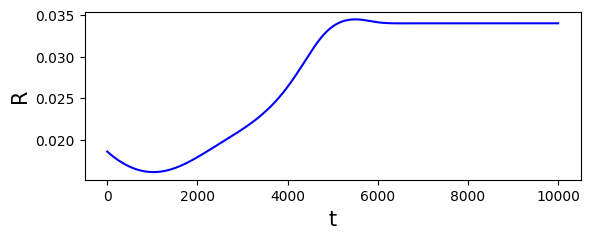

In [307]:
# plt.plot(t,R1_S)
plt.subplot(212)
plt.plot(t,R2_S,color='blue')
plt.ylabel('R',fontsize=15)
plt.xlabel('t',fontsize=15)

Text(0.5, 0, 't')

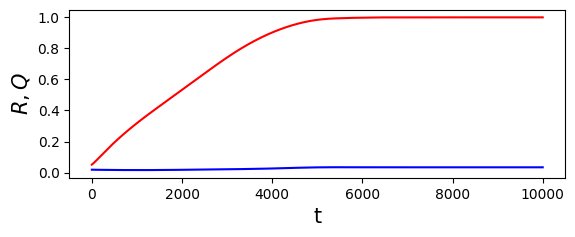

In [296]:
# plt.plot(t,R1_S)
plt.subplot(212)
plt.plot(t,Q2_S,color='red')
plt.plot(t,R2_S,color='Blue')
plt.ylabel('$R,Q$',fontsize=15)
plt.xlabel('t',fontsize=15)

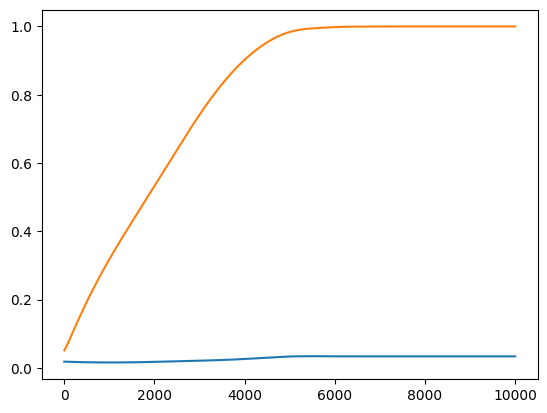

In [279]:
# plt.plot(t,R1_S)
# plt.plot(t,Q1_S)

plt.plot(t,R2_S)
plt.plot(t,Q2_S)

In [284]:
Q2_S[-1],R2_S[0],

(1.0, 0.018564856)

In [318]:
np.searchsorted(Q2_S,0.5)

18455

In [317]:
Q2_S[0]

0.05133109

In [315]:
index= -1

TH = thetas[:,N:]
Arg_D = np.arange(N)
TL = np.sort(TH[index])
RA = Z1bs
SND = np.ones(N)*N
ND = np.ones(N)*N

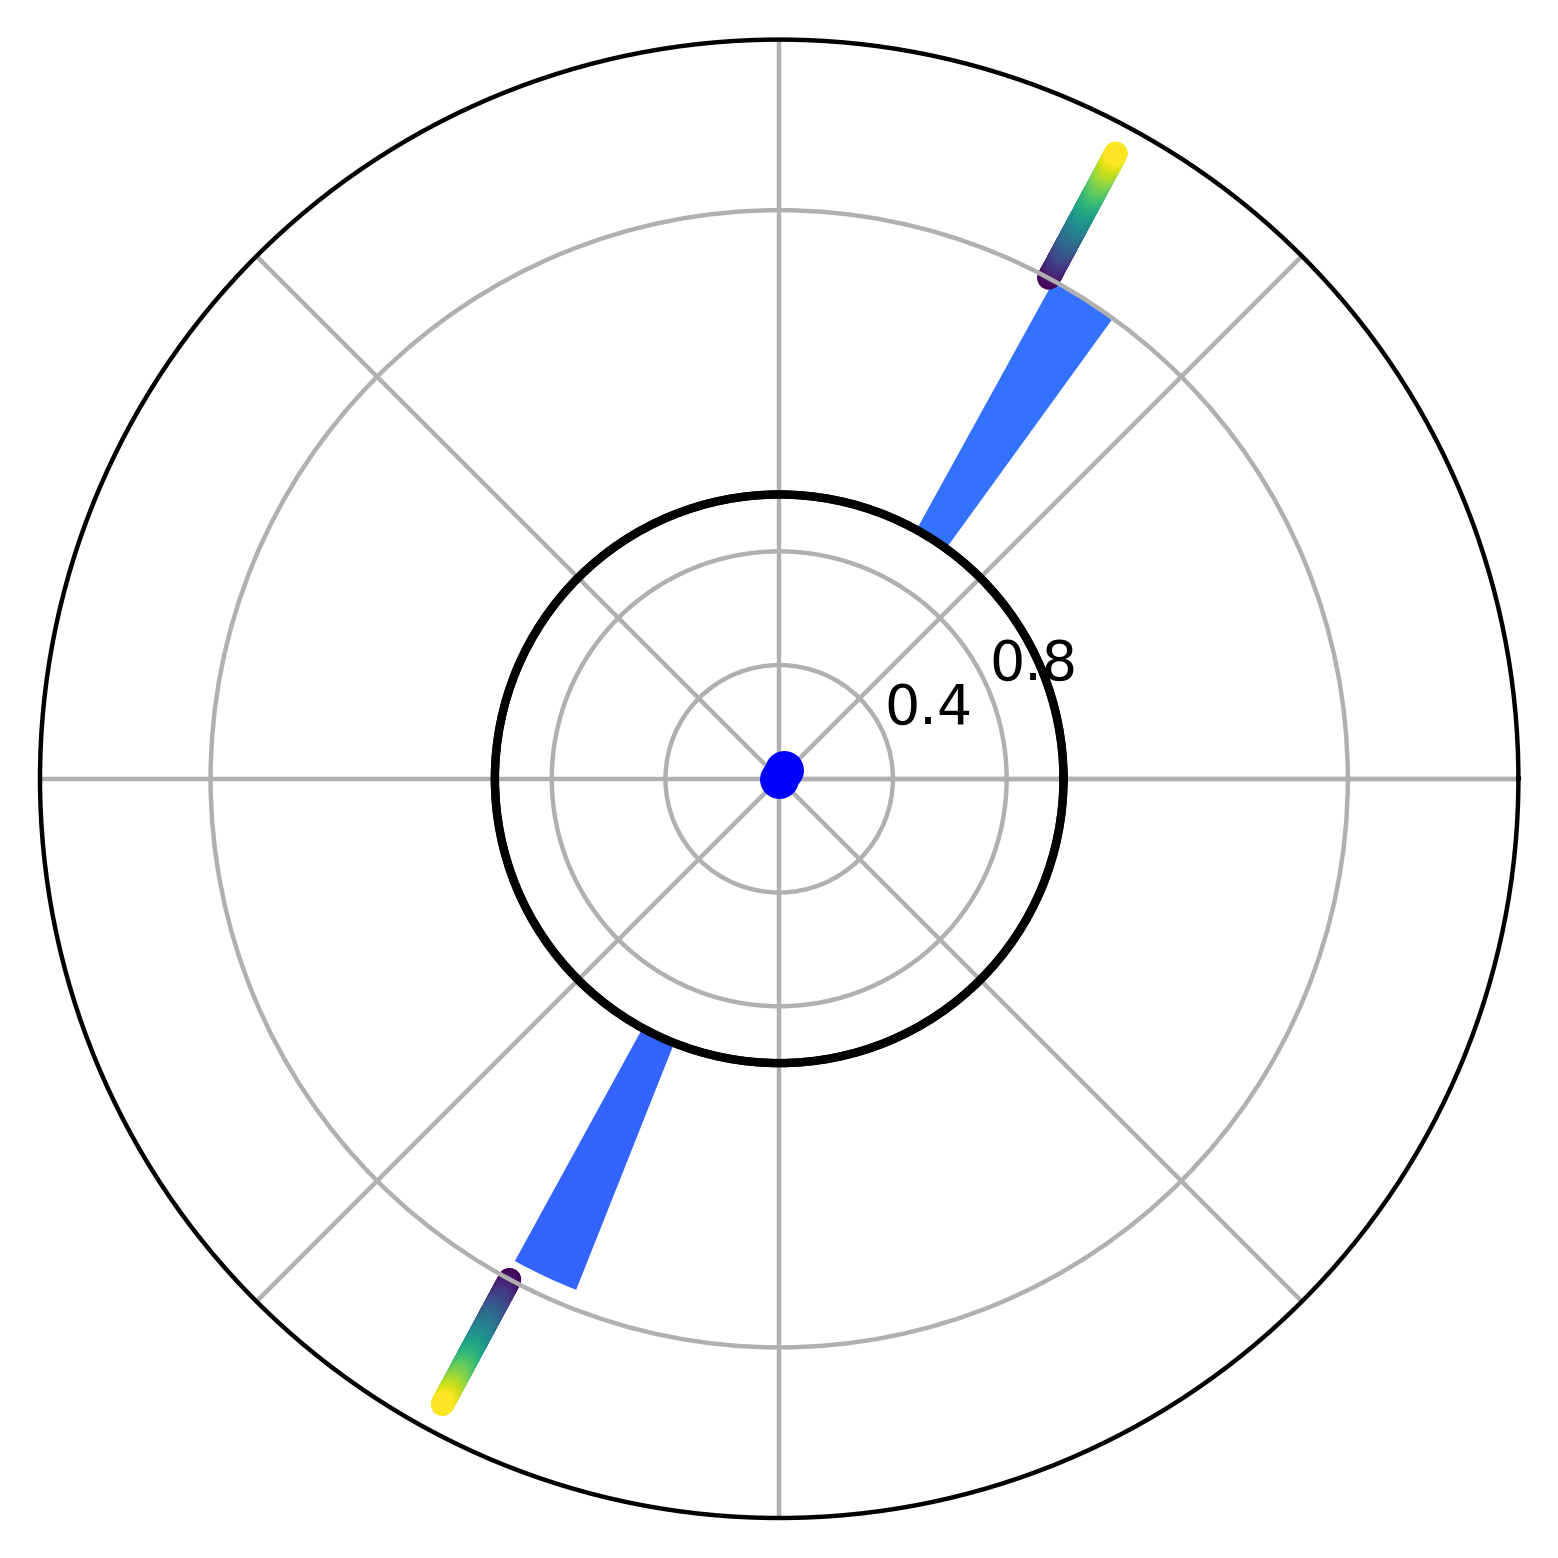

In [316]:
fig =plt.figure(dpi=400)
ax = plt.subplot(111, polar=True)

num_bin = 51
T_bins = np.linspace(0,2*np.pi,num_bin+1)
T_bin_ = np.linspace(0,2*np.pi,num_bin)

CT,_ = np.histogram(TH[index,:]%(np.pi*2),bins=T_bins,density=True)
CT = CT / np.max(CT)

# CL,_ = np.histogram(L_TH[index,:]%(np.pi*2),bins=T_bins,density=True)
# CL = CL / np.max(CL)

# CH,_ = np.histogram(H_TH[index,:]%(np.pi*2),bins=T_bins,density=True)
# CH = CH / np.max(CH)

T_Bottom = 1.
T_Maxh = 1
T_Radii = T_Maxh*CT
T_width = (2*np.pi) / num_bin

T_bars = ax.bar(T_bin_, T_Radii, width=T_width, bottom=T_Bottom)



for r, bar in zip(T_Radii, T_bars):
    bar.set_facecolor(plt.cm.jet(r/5))
    # bar.set_facecolor(plt.cm.autumn(r/5))
    # bar.set_facecolor(plt.cm.summer(r/5))
    bar.set_height(r)
    bar.set_alpha(0.8)

# for r, bar in zip(L_Radii, L_bars):
#     bar.set_facecolor(plt.cm.autumn(r/5))
#     bar.set_height(r)
#     bar.set_alpha(0.8)

# for r, bar in zip(H_Radii, H_bars):
#     bar.set_facecolor(plt.cm.summer(r/5))
#     bar.set_height(r)
#     bar.set_alpha(0.8)
Y = 2+0.5*(SND/max(ND))
SC = plt.scatter(TH[index,Arg_D],2+0.5*(np.arange(N)/max(ND)),s=N/100,c=np.arange(N),alpha=0.9)
# Y = 2.0+0.5*((TL)/np.max(TL))
# SC = plt.scatter(TH[index,Arg_D],2.0+0.5*((TL)/np.max(TL)),s=N/100,c=np.arange(N),alpha=0.9)

# pl1, = plt.plot([0,np.angle(RA[index])],[0,abs(RA[index])],color='red',lw=2.5,marker='o')
pl1, = plt.plot([0,np.angle(RA[index])],[0,abs(RA[index])],color='blue',lw=2.5,marker='o')
# plL, = plt.plot([0,np.angle(HRA[index])],[0,abs(HRA[index])],color='green',lw=2.5,marker='o')
# plH, = plt.plot([0,np.angle(LRA[index])],[0,abs(LRA[index])],color='red',lw=2.5,marker='o')
# pl2, = plt.plot([0,np.angle(S)],[0,abs(S)],lw=2.5,marker='o',markerfacecolor='white',markeredgecolor='k',color='black')
plt.axhline(1,color='black')
# l1, =plt.plot([0,np.pi,np.pi*2],[1,1,1],color='black')

# l1 =plt.axhline(1,color='black')

plt.axhline(1,color='black')
plt.ylim(0,2.6)
plt.yticks([0,0.4,0.8,1,2.0],["",0.4,0.8,"",""]);
xt_ = np.linspace(0,2,9)

plt.xticks(xt_*np.pi,[""]*9);
# plt.show()

## 2 Group

In [558]:
index= -1

TH = 2 * thetas[:,N:]
Arg_D = np.arange(N)
TL = np.sort(TH[index])
RA = Z2bs
SND = np.ones(N)*N
ND = np.ones(N)*N

In [560]:
index= -1

TH = 2 * thetas[:,:N]
Arg_D = np.arange(N)
TL = np.sort(TH[index])
RA = Z2as
SND = np.ones(N)*N
ND = np.ones(N)*N

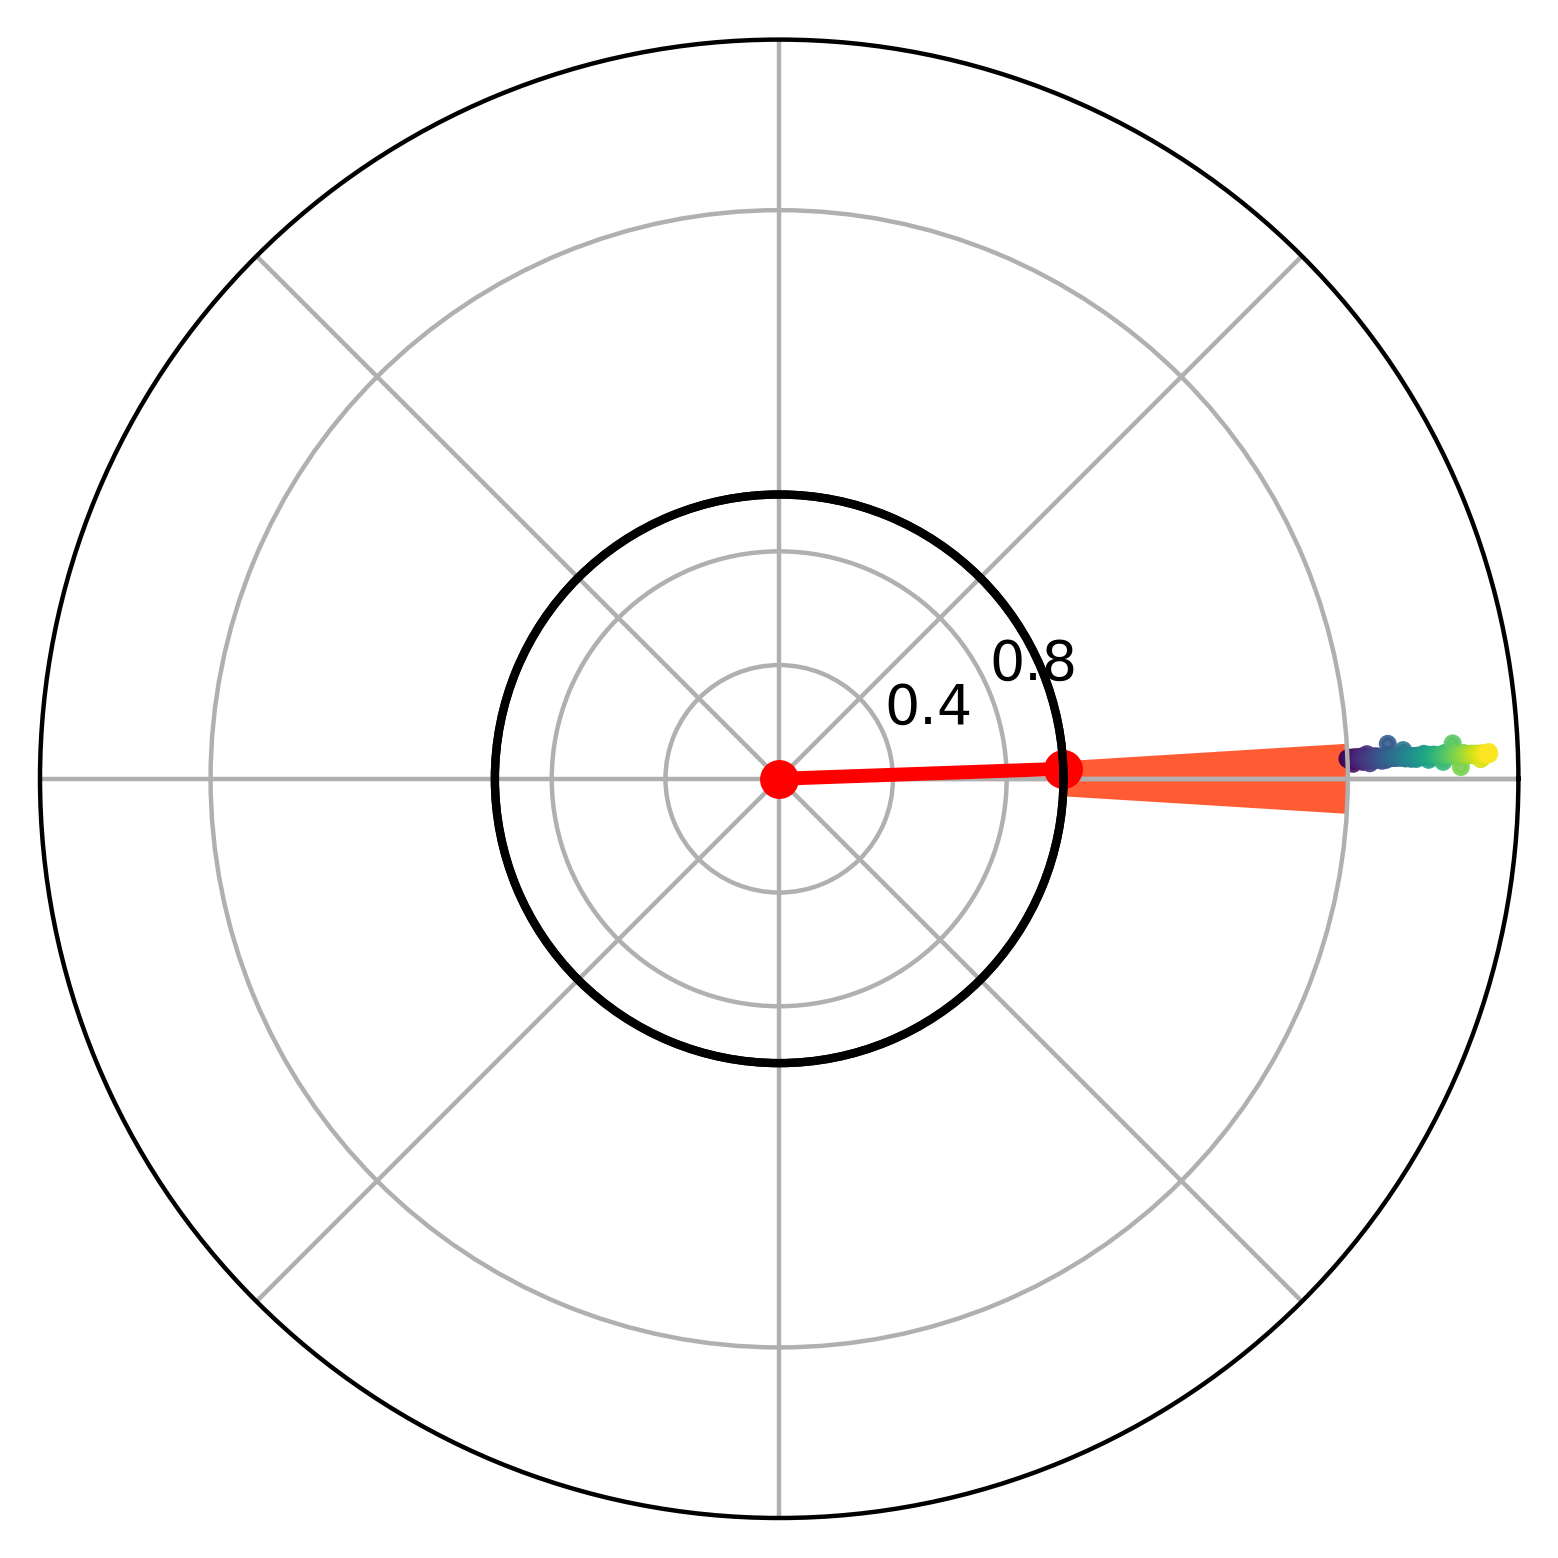

In [561]:
fig =plt.figure(dpi=400)
ax = plt.subplot(111, polar=True)

num_bin = 51
T_bins = np.linspace(0,2*np.pi,num_bin+1)
T_bin_ = np.linspace(0,2*np.pi,num_bin)

CT,_ = np.histogram(TH[index,:]%(np.pi*2),bins=T_bins,density=True)
CT = CT / np.max(CT)

# CL,_ = np.histogram(L_TH[index,:]%(np.pi*2),bins=T_bins,density=True)
# CL = CL / np.max(CL)

# CH,_ = np.histogram(H_TH[index,:]%(np.pi*2),bins=T_bins,density=True)
# CH = CH / np.max(CH)

T_Bottom = 1.
T_Maxh = 1
T_Radii = T_Maxh*CT
T_width = (2*np.pi) / num_bin

T_bars = ax.bar(T_bin_, T_Radii, width=T_width, bottom=T_Bottom)



for r, bar in zip(T_Radii, T_bars):
    # bar.set_facecolor(plt.cm.jet(r/5))
    bar.set_facecolor(plt.cm.autumn(r/5))
    # bar.set_facecolor(plt.cm.summer(r/5))
    bar.set_height(r)
    bar.set_alpha(0.8)

# for r, bar in zip(L_Radii, L_bars):
#     bar.set_facecolor(plt.cm.autumn(r/5))
#     bar.set_height(r)
#     bar.set_alpha(0.8)

# for r, bar in zip(H_Radii, H_bars):
#     bar.set_facecolor(plt.cm.summer(r/5))
#     bar.set_height(r)
#     bar.set_alpha(0.8)
Y = 2+0.5*(SND/max(ND))
SC = plt.scatter(TH[index,Arg_D],2+0.5*(np.arange(N)/max(ND)),s=N/100,c=np.arange(N),alpha=0.9)
# Y = 2.0+0.5*((TL)/np.max(TL))
# SC = plt.scatter(TH[index,Arg_D],2.0+0.5*((TL)/np.max(TL)),s=N/100,c=np.arange(N),alpha=0.9)

pl1, = plt.plot([0,np.angle(RA[index])],[0,abs(RA[index])],color='red',lw=2.5,marker='o')
# pl1, = plt.plot([0,np.angle(RA[index])],[0,abs(RA[index])],color='blue',lw=2.5,marker='o')
# plL, = plt.plot([0,np.angle(HRA[index])],[0,abs(HRA[index])],color='green',lw=2.5,marker='o')
# plH, = plt.plot([0,np.angle(LRA[index])],[0,abs(LRA[index])],color='red',lw=2.5,marker='o')
# pl2, = plt.plot([0,np.angle(S)],[0,abs(S)],lw=2.5,marker='o',markerfacecolor='white',markeredgecolor='k',color='black')
plt.axhline(1,color='black')
# l1, =plt.plot([0,np.pi,np.pi*2],[1,1,1],color='black')

# l1 =plt.axhline(1,color='black')

plt.axhline(1,color='black')
plt.ylim(0,2.6)
plt.yticks([0,0.4,0.8,1,2.0],["",0.4,0.8,"",""]);
xt_ = np.linspace(0,2,9)

plt.xticks(xt_*np.pi,[""]*9);
# plt.show()

# 다른 초기조건에서 나타나는 시뮬레이션 결과

num1 = 90
num2 = 91

In [521]:
t = np.arange(0,5000,0.1)

Text(0.5, 0, 't')

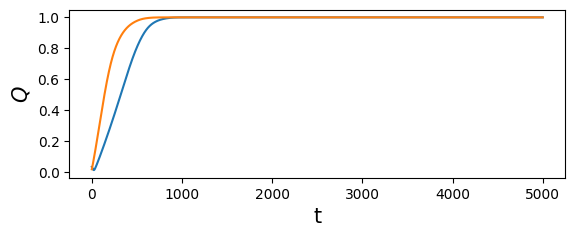

In [585]:
N1 = N2 = N
K = 1

alpha = 0
beta = 0.3
N = 500
N1 = N2 = N

num2 = num1+1
np.random.seed(num1)
theta1 = np.random.uniform(0,np.pi*2,N)
np.random.seed(num2)
theta2 = np.random.uniform(0,np.pi*2,N)
Theta = np.r_[theta1,theta2]


thetas,(Z1as,Z1bs,Z2as,Z2bs) = RK4_ZZ(Kuramoto_MF_CHIMERA,Theta.copy(),t,args=(N1,N2,beta,alpha,K))
R1_S = np.abs(Z1as)
R2_S = np.abs(Z1bs)
Q1_S = np.abs(Z2as)
Q2_S = np.abs(Z2bs)
num1 += 1

plt.subplot(211)
plt.plot(t,Q2_S)
plt.plot(t,Q1_S)
plt.ylabel('$Q$',fontsize=15)
plt.xlabel('t',fontsize=15)

## 긴 시간에서의 확인

In [519]:
t = np.arange(0,15000,0.1)
thetas,(Z1as,Z1bs,Z2as,Z2bs) = RK4_ZZ(Kuramoto_MF_CHIMERA,Theta.copy(),t,args=(N1,N2,beta,alpha,K))
R1_S = np.abs(Z1as)
R2_S = np.abs(Z1bs)
Q1_S = np.abs(Z2as)
Q2_S = np.abs(Z2bs)

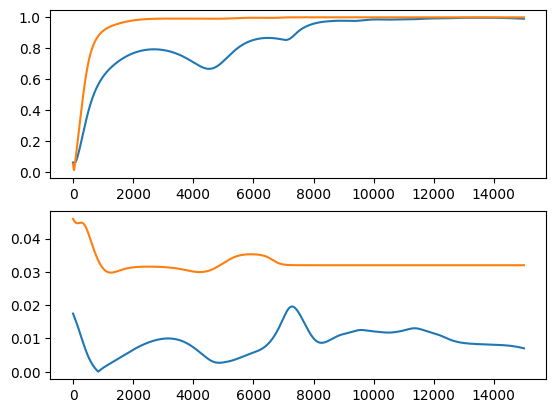

In [520]:
plt.subplot(211)
plt.plot(t,Q2_S)
plt.plot(t,Q1_S)

plt.subplot(212)
plt.plot(t,R2_S)
plt.plot(t,R1_S)